In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import scipy.stats as st
import statistics as stat

%matplotlib inline

In [135]:
df_1 = 'df_final_demo.csv'
df_2= 'df_final_experiment_clients.csv'
df_3 = 'df_final_web_data_merged.csv'

#df_t1 = 'df_final_web_data_pt_1.csv'

df_fd = pd.read_csv(df_1)
df_fe_c = pd.read_csv(df_2)
df_fw_dm = pd.read_csv(df_3)
#df_p1 = pd.read_csv(df_t1)


C:\Users\bfran\AppData\Local\Temp\ipykernel_15324\688577527.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fw_dm = pd.read_csv(df_3)


In [136]:
df_fw_dm

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755402,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755403,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755404,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [137]:
df_fe_c

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


The marked client ID's are the one that were in the test, the others were not in the test

In [138]:
df_fd

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.00,73.00,60.50,U,2.00,45105.30,6.00,9.00
1,2304905,7.00,94.00,58.00,U,2.00,110860.30,6.00,9.00
2,1439522,5.00,64.00,32.00,U,2.00,52467.79,6.00,9.00
3,1562045,16.00,198.00,49.00,M,2.00,67454.65,3.00,6.00
4,5126305,12.00,145.00,33.00,F,2.00,103671.75,0.00,3.00
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.00,56.00,38.50,U,3.00,1411062.68,5.00,5.00
70605,8981690,12.00,148.00,31.00,M,2.00,101867.07,6.00,6.00
70606,333913,16.00,198.00,61.50,F,2.00,40745.00,3.00,3.00
70607,1573142,21.00,255.00,68.00,M,3.00,475114.69,4.00,4.00


In [139]:
df_fw_dm.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [140]:
df_fw_dm

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755402,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755403,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755404,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [141]:
df_fw_dm.drop([343141], inplace = True)

In [142]:
# use this to change the scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
df_fd.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,70609.00,5004991.88,2877277.63,169.00,2519329.00,5016978.00,7483085.00,9999839.00
clnt_tenure_yr,70595.00,12.05,6.87,2.00,6.00,11.00,16.00,62.00
clnt_tenure_mnth,70595.00,150.66,82.09,33.00,82.00,136.00,192.00,749.00
clnt_age,70594.00,46.44,15.59,13.50,32.50,47.00,59.00,96.00
num_accts,70595.00,2.26,0.53,1.00,2.00,2.00,2.00,8.00
bal,70595.00,147445.24,301508.71,13789.42,37346.83,63332.90,137544.90,16320040.15
calls_6_mnth,70595.00,3.38,2.24,0.00,1.00,3.00,6.00,7.00
logons_6_mnth,70595.00,5.57,2.35,1.00,4.00,5.00,7.00,9.00


In [143]:
df_sub = df_fd[df_fd['bal'].isnull()]

In [144]:
df_sub

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46076,8611797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df_fd.dropna(inplace = True)

In [146]:
df_fd.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [147]:
df_fd = df_fd.astype({'clnt_tenure_yr': int,'clnt_tenure_mnth': int,'clnt_age': int,'calls_6_mnth': int,'logons_6_mnth': int,'num_accts': int })


In [148]:
df_fd

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2,45105.30,6,9
1,2304905,7,94,58,U,2,110860.30,6,9
2,1439522,5,64,32,U,2,52467.79,6,9
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,U,3,1411062.68,5,5
70605,8981690,12,148,31,M,2,101867.07,6,6
70606,333913,16,198,61,F,2,40745.00,3,3
70607,1573142,21,255,68,M,3,475114.69,4,4


In [149]:
df_fe_c.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [150]:
df_fe_c.dropna(inplace = True)

In [151]:
df_fe_c.rename(columns={'Variation':'variation'}, inplace = True)

In [152]:
df_fe_c.variation.value_counts()

variation
Test       26968
Control    23532
Name: count, dtype: int64

In [153]:
df_fd['gendr'].replace({'X': 'U'}, inplace=True)


In [154]:
test_subjects_df = pd.merge(df_fw_dm, df_fe_c, on='client_id')

In [155]:
test_subjects_df

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
307626,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
307627,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
307628,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
307629,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


## Who are the primary clients who use this online process?

In [156]:
df_fd['logons_6_mnth'].describe()

count   70594.00
mean        5.57
std         2.35
min         1.00
25%         4.00
50%         5.00
75%         7.00
max         9.00
Name: logons_6_mnth, dtype: float64

This tells us that only clients who logged in at least once in the last six months are considered clients at all.
 
The mean number of logins in 5.57 times a month, with the median being 5, so on average a customer will logon to the service just under once a month. 

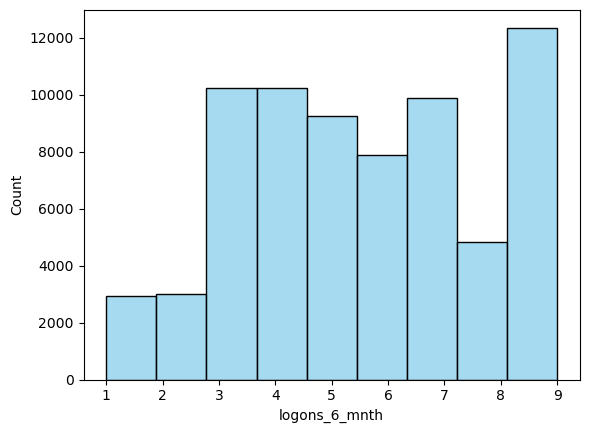

In [157]:
sns.histplot(df_fd['logons_6_mnth'], bins=9, color="skyblue");

A quick glance at a histogram shows that there isn't an even distribution of user logins, so that won't help us determine what a "typical" customer logon rate looks like. 

So, I'm going to just pull information on those customers who log in at least once every other month, or 3 times every 6 months. It seems from this histogram like customers who log in less frequently than that are a typical anyway. 

In [158]:
# Create a subset of data containing only those clients who logged on more than twice in the last six months. 
logon_three = df_fd[df_fd['logons_6_mnth'] > 2]

logon_three.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,64647.00,5005047.00,2879203.12,169.00,2515105.00,5019785.00,7483242.50,9999839.00
clnt_tenure_yr,64647.00,12.10,6.92,2.00,6.00,11.00,16.00,62.00
clnt_tenure_mnth,64647.00,151.23,82.64,33.00,82.00,137.00,193.00,749.00
clnt_age,64647.00,46.53,15.63,13.00,33.00,47.00,59.00,96.00
num_accts,64647.00,2.27,0.55,1.00,2.00,2.00,2.00,8.00
bal,64647.00,153563.97,311035.75,13791.80,39010.96,65984.81,143617.72,16320040.15
calls_6_mnth,64647.00,3.56,2.25,0.00,2.00,4.00,6.00,7.00
logons_6_mnth,64647.00,5.94,2.09,3.00,4.00,6.00,8.00,9.00


In [159]:
df_fd.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,70594.00,5005025.75,2877289.31,169.00,2519542.75,5016973.50,7483074.25,9999839.00
clnt_tenure_yr,70594.00,12.05,6.87,2.00,6.00,11.00,16.00,62.00
clnt_tenure_mnth,70594.00,150.66,82.09,33.00,82.00,136.00,192.00,749.00
clnt_age,70594.00,46.18,15.60,13.00,32.00,47.00,59.00,96.00
num_accts,70594.00,2.26,0.53,1.00,2.00,2.00,2.00,8.00
bal,70594.00,147446.73,301510.58,13789.42,37346.60,63334.59,137546.12,16320040.15
calls_6_mnth,70594.00,3.38,2.24,0.00,1.00,3.00,6.00,7.00
logons_6_mnth,70594.00,5.57,2.35,1.00,4.00,5.00,7.00,9.00


Comparing the subset with the whole dataframe, it seems that there isn't much difference between the two when looking at regular descriptive statistics, meaning that the original can be used without much issue. 

Going solely off of descriptive statistics, it seems that typical* clients are as follows.
- They have been with the company for between 6 and 18 years, or between 70 and 220 months. 
- They are typically between 30 and 60 years old. 
- They have up to 3 accounts. 
- They carry a balance with the company of up to 450,000.
- They've made between 1 and 5 calls in the last six months.
- They've logged on between 2 and 8 times. 

*typicality of clients determined by looking at means and standard deviations. 

## Are clients older or younger?

## Are they newer or longstanding?

In [160]:
df_fd_young = df_fd[df_fd['clnt_tenure_yr'] <= 10]

df_fd_young 

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2,45105.30,6,9
1,2304905,7,94,58,U,2,110860.30,6,9
2,1439522,5,64,32,U,2,52467.79,6,9
5,3727881,5,71,30,U,2,23915.60,0,3
6,272934,5,66,58,U,2,27021.42,2,5
...,...,...,...,...,...,...,...,...,...
70599,4851159,6,79,60,U,2,74501.76,4,4
70600,6746156,8,106,32,F,2,19019.55,1,1
70602,7979279,4,49,35,F,2,40441.45,3,3
70603,2489338,5,66,17,U,2,17869.95,4,4


In [161]:
df_fd_teens = df_fd[(df_fd['clnt_tenure_yr'] > 10) & (df_fd['clnt_tenure_yr'] <= 20)]

df_fd_teens

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3
9,8198645,15,189,54,F,2,382303.83,6,9
13,2214073,16,193,62,M,3,136818.03,6,9
18,719792,11,136,31,F,2,111736.78,5,8
...,...,...,...,...,...,...,...,...,...
70593,7217125,14,178,58,U,2,319382.04,5,6
70595,1196936,15,184,45,F,2,482000.12,1,1
70601,2690705,15,181,53,F,2,24910.52,3,3
70605,8981690,12,148,31,M,2,101867.07,6,6


In [162]:
df_fd_tw = df_fd[(df_fd['clnt_tenure_yr'] > 20) & (df_fd['clnt_tenure_yr'] <= 30)]

df_fd_tw

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
7,388801,30,361,57,M,5,522498.72,1,4
8,285619,30,369,67,M,2,299388.72,3,6
40,3753796,25,305,66,F,2,214661.75,6,9
41,6647577,23,286,68,F,3,86005.57,2,5
42,6341488,23,285,65,F,2,116534.46,5,8
...,...,...,...,...,...,...,...,...,...
70581,2184810,23,286,75,M,4,2496314.67,7,7
70584,1018789,21,253,39,M,2,81209.33,4,4
70585,1331944,23,285,60,M,2,34168.90,1,1
70607,1573142,21,255,68,M,3,475114.69,4,4


In [163]:
df_fd_old =  df_fd[df_fd['clnt_tenure_yr'] > 30]

df_fd_old

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
260,6815257,46,554,72,M,2,92157.08,1,4
337,9371037,32,395,68,M,3,181523.87,2,6
540,7236024,33,399,65,F,2,75865.33,0,3
632,4244298,32,388,66,F,2,153623.34,6,9
644,1088201,35,421,54,M,2,23926.17,1,4
...,...,...,...,...,...,...,...,...,...
70262,6680664,33,400,54,F,2,327940.61,1,1
70276,4270267,32,390,31,M,2,228691.16,7,7
70338,879715,32,394,65,F,4,129292.82,3,3
70524,9147180,31,374,24,F,2,57062.46,5,5


In [164]:
len(df_fd) == len(df_fd_young) + len(df_fd_teens) + len(df_fd_tw) + len(df_fd_old)

True

In [165]:
# Discretizing client age into 9 groups
# takes continuous variables and turns them in discreet variables by binning them
bins = [10, 19, 29, 39, 49, 59, 69, 79, 89, df_fd['clnt_age'].max()]
labels = ['10', '20', '30', '40', '50', '60', '70', '80', '90']
# create new column using the data above
df_fd['clnt_age_range'] = pd.cut(df_fd['clnt_age'], bins=bins, labels=labels, include_lowest=True)
df_fd.clnt_age_range.value_counts()

clnt_age_range
50    15525
30    13132
40    12419
20    12083
60    11950
70     3572
10     1216
80      648
90       49
Name: count, dtype: int64

<Axes: xlabel='clnt_age_range', ylabel='Count'>

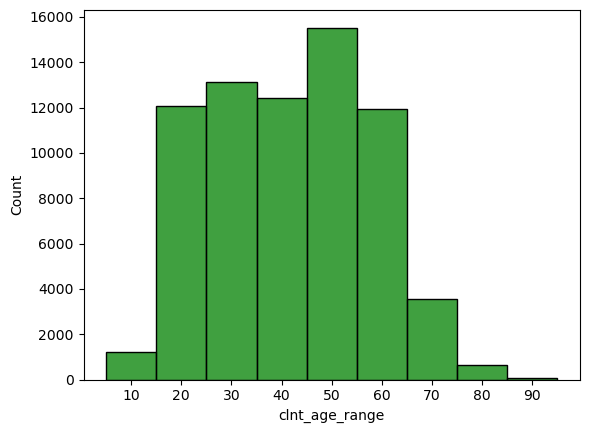

In [166]:
sns.histplot(df_fd['clnt_age_range'], bins=30, color="green")

### Visualizations

**Categorical Values**

In [167]:
frequency_table = df_fe_c['variation'].value_counts()
proportion_table = df_fe_c['variation'].value_counts(normalize=True)

frequency_table, proportion_table

(variation
 Test       26968
 Control    23532
 Name: count, dtype: int64,
 variation
 Test      0.53
 Control   0.47
 Name: proportion, dtype: float64)

In [168]:
frequency_gender = df_fd['gendr'].value_counts()
proportion_gender = df_fd['gendr'].value_counts(normalize=True)
frequency_gender, proportion_gender

(gendr
 U    24125
 M    23724
 F    22745
 Name: count, dtype: int64,
 gendr
 U   0.34
 M   0.34
 F   0.32
 Name: proportion, dtype: float64)

In [169]:
frequency_process_steps = test_subjects_df['process_step'].value_counts()
proportion_process_steps = test_subjects_df['process_step'].value_counts(normalize=True)
frequency_process_steps, proportion_process_steps

(process_step
 start      99162
 step_1     65548
 step_2     54631
 step_3     46875
 confirm    41415
 Name: count, dtype: int64,
 process_step
 start     0.32
 step_1    0.21
 step_2    0.18
 step_3    0.15
 confirm   0.13
 Name: proportion, dtype: float64)

In [170]:
# Create a list of categories sorted by total counts in descending order
category_order = ['Control','Test']
hue_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

<Axes: xlabel='variation', ylabel='count'>

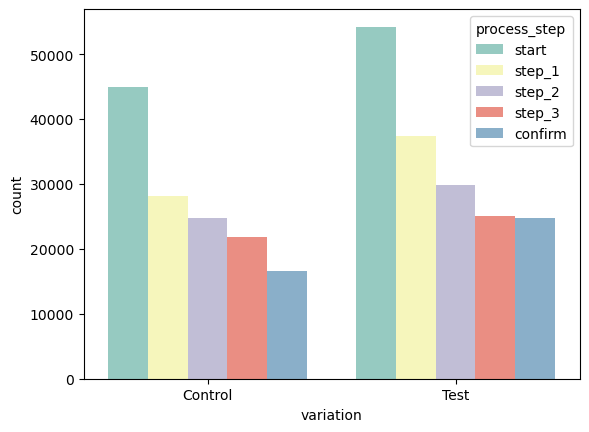

In [171]:
# Plotting a grouped bar chart
sns.countplot(data=test_subjects_df, x='variation', hue= 'process_step', palette='Set3', order = category_order, hue_order = hue_order)

C:\Users\bfran\AppData\Local\Temp\ipykernel_15324\4120208587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_gender.index, y=frequency_gender.values, palette="Set3");


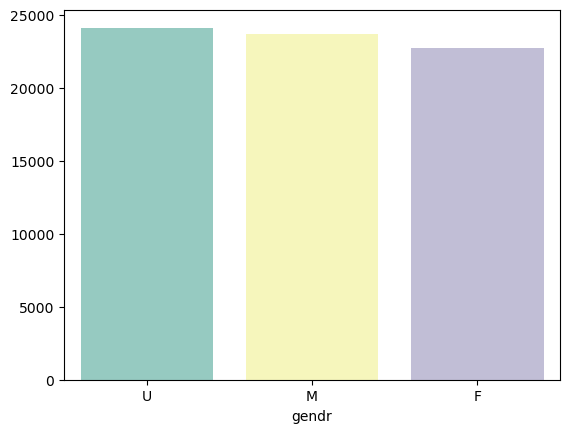

In [172]:
# Plotting a bar chart using the values from the frequency gender table, with colors sourced from the "Set3" palette
sns.barplot(x=frequency_gender.index, y=frequency_gender.values, palette="Set3");

**Numerical Values**

In [173]:
demographic_numerical = df_fd.select_dtypes("number")
demographic_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,70594.00,5005025.75,2877289.31,169.00,2519542.75,5016973.50,7483074.25,9999839.00
clnt_tenure_yr,70594.00,12.05,6.87,2.00,6.00,11.00,16.00,62.00
clnt_tenure_mnth,70594.00,150.66,82.09,33.00,82.00,136.00,192.00,749.00
clnt_age,70594.00,46.18,15.60,13.00,32.00,47.00,59.00,96.00
num_accts,70594.00,2.26,0.53,1.00,2.00,2.00,2.00,8.00
bal,70594.00,147446.73,301510.58,13789.42,37346.60,63334.59,137546.12,16320040.15
calls_6_mnth,70594.00,3.38,2.24,0.00,1.00,3.00,6.00,7.00
logons_6_mnth,70594.00,5.57,2.35,1.00,4.00,5.00,7.00,9.00


**Shape of distribution**

In [174]:
client_age_skewness = demographic_numerical['clnt_age'].skew()
client_age_kurtosis = demographic_numerical['clnt_age'].kurtosis()

client_age_skewness, client_age_kurtosis

(0.08294227402556785, -0.9239629855316349)

<Axes: xlabel='clnt_age', ylabel='Count'>

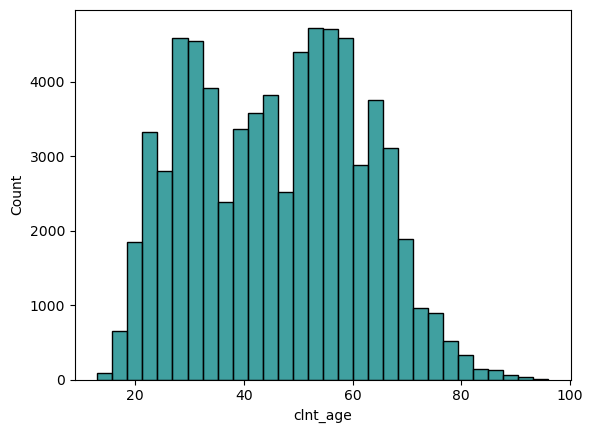

In [175]:
sns.histplot(demographic_numerical['clnt_age'], bins=30, color="teal")

<Axes: ylabel='clnt_age'>

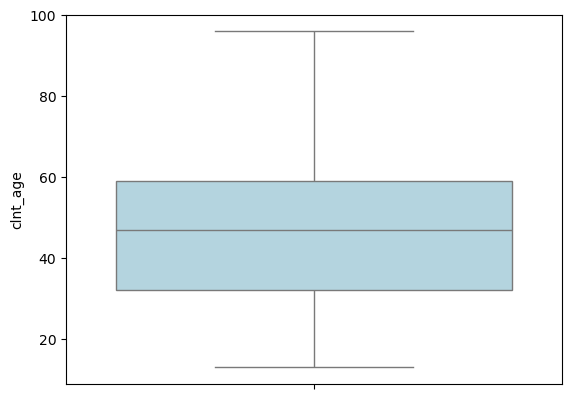

In [176]:
sns.boxplot(data = demographic_numerical['clnt_age'], color="lightblue")

In [177]:
year_tenure_skewness = demographic_numerical['clnt_tenure_yr'].skew()
year_tenure_kurtosis = demographic_numerical['clnt_tenure_yr'].kurtosis()

year_tenure_skewness, year_tenure_kurtosis

(1.0366247018480386, 1.0709232170805043)

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

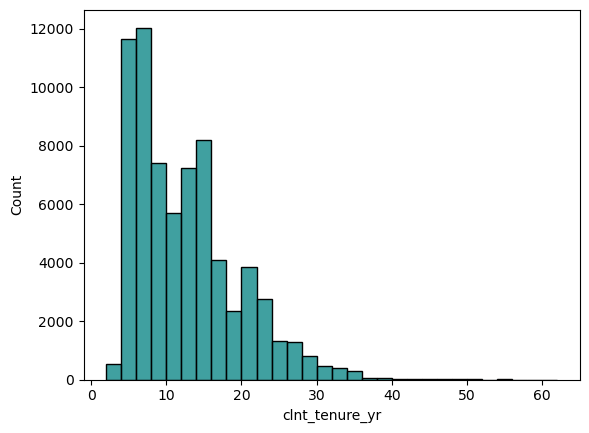

In [178]:
sns.histplot(demographic_numerical['clnt_tenure_yr'], bins=30, color="teal")

<Axes: ylabel='clnt_tenure_yr'>

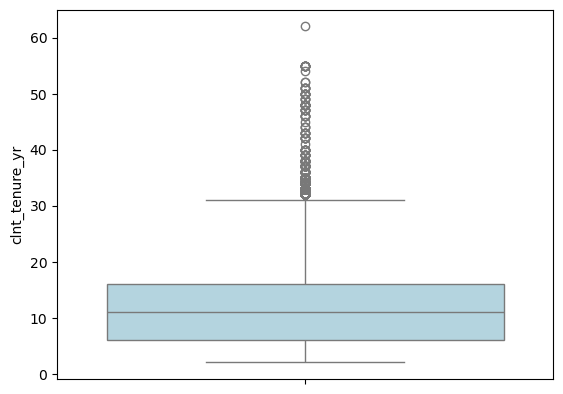

In [179]:
sns.boxplot(data = demographic_numerical['clnt_tenure_yr'], color="lightblue")

In [180]:
month_tenure_skewness = demographic_numerical['clnt_tenure_mnth'].skew()
month_tenure_kurtosis = demographic_numerical['clnt_tenure_mnth'].kurtosis()

month_tenure_skewness, month_tenure_kurtosis

(1.0506517922170102, 1.102446928017626)

<Axes: xlabel='clnt_tenure_mnth', ylabel='Count'>

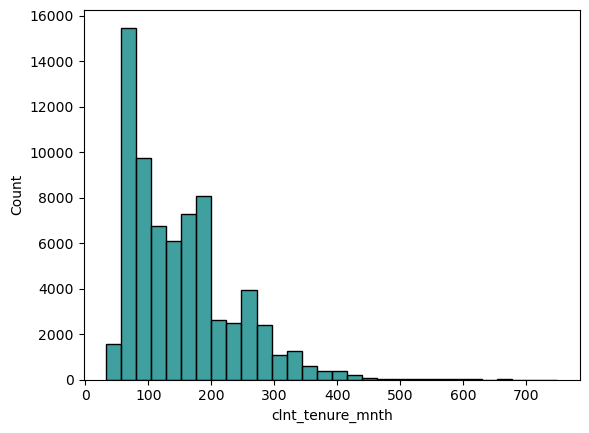

In [181]:
sns.histplot(demographic_numerical['clnt_tenure_mnth'], bins=30, color="teal")

<Axes: ylabel='clnt_tenure_mnth'>

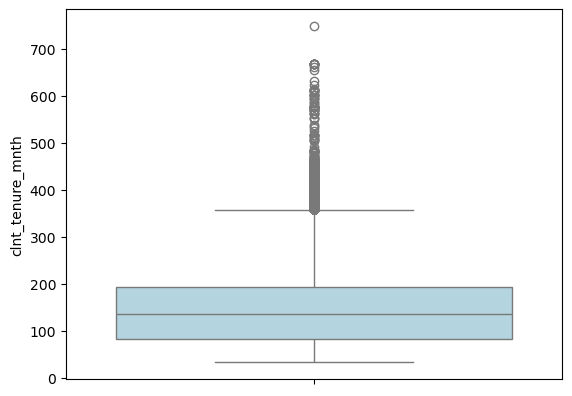

In [182]:
sns.boxplot(data = demographic_numerical['clnt_tenure_mnth'], color="lightblue")

### KPI Analysis - Completion Rate

One of the main KPI's we decided to investigate was whether or not a statistically significant greater number of clients were able to finish the entire website process in the test or control group. If more people in the control group are able to complete the process in the test group, then the new version of the website should be maintained if completion of the process is desirable. 

In [183]:
# Displays number of client ids used
print(test_subjects_df['client_id'].nunique())

# Displays the number of visitor ids assigned
print(test_subjects_df['visitor_id'].nunique())

# Displays the number of visit ids assigned
print(test_subjects_df['visit_id'].nunique())

# The fact that there are more visit ids shows that some clients used the process multiple times. 

48781
53911
66298


As we examined the data we found that many Vanguard clients visited the site and/or worked through the process multiple times. Because of that we decided to group the visits by visit id, so we could see the number of *visits* in which a client made it to a certain step. We also wanted to know how far clients progressed through the website process in each visit, so we created a subset that only contains the most recent step a client was on by visit id. In doing so, we have controlled for instances in which a process confirmed multiple times despite a client only reaching that step once.

In [184]:
# Converts date_time column to an actual datetime instead of a string
test_subjects_df['date_time'] = pd.to_datetime(test_subjects_df['date_time'])

# creates subset that only shows the most recent/final step recorded under any given visit id. 
last_visit_step_df = test_subjects_df.groupby('visit_id').first().reset_index()

In [185]:
last_visit_step_df

,visit_id,client_id,visitor_id,process_step,date_time,variation
0,100012776_37918976071_457913,3561384,451664975_1722933822,confirm,2017-04-26 13:23:09,Test
1,100019538_17884295066_43909,7338123,612065484_94198474375,confirm,2017-04-09 16:24:58,Test
2,100030127_47967100085_936361,105007,676020267_36602664238,start,2017-03-22 11:07:49,Control
3,100037962_47432393712_705583,5623007,700426174_33289797318,start,2017-04-14 16:44:03,Control
4,100057941_88477660212_944512,4823947,611052344_43146965242,step_3,2017-04-09 11:34:24,Control
...,...,...,...,...,...,...
66293,999971096_28827267783_236076,2979920,830229399_73416253406,confirm,2017-04-13 10:34:08,Test
66294,999976049_95772503197_182554,4449968,842902495_57580498240,confirm,2017-04-04 13:02:18,Test
66295,999984454_18731538378_781808,829911,648229874_89449279372,confirm,2017-03-29 11:21:07,Test
66296,999985675_64610694964_443659,4064969,110735946_42614968419,confirm,2017-04-20 10:02:48,Control


<Axes: xlabel='variation', ylabel='count'>

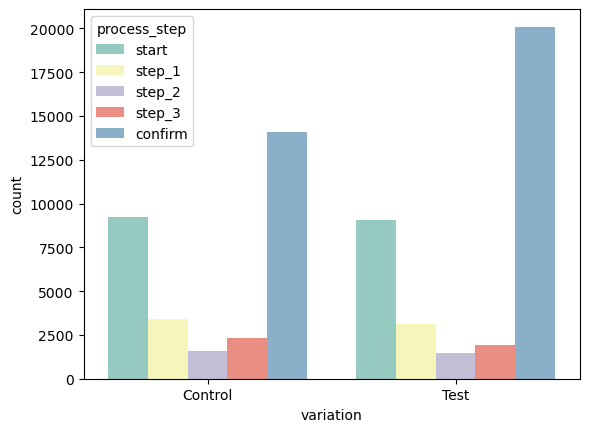

In [186]:
# Plotting a grouped bar chart
sns.countplot(data=last_visit_step_df, x='variation', hue= 'process_step', palette='Set3', order = category_order, hue_order = hue_order)

A brief comparison of the results seems to indicate that more clients are able to move from step 3 to confirmation - but we want to know if those results are statistically significant or are just happenstance. 

In [187]:
last_visit_step_df['process_step'].value_counts()

process_step
confirm    34175
start      18310
step_1      6544
step_3      4255
step_2      3014
Name: count, dtype: int64

In both categories, we had a total of 41,415 clients reached the confirmation step. 

In [188]:
last_visit_step_df[last_visit_step_df['variation'] == 'Control']['process_step'].value_counts()

process_step
confirm    14075
start       9227
step_1      3415
step_3      2339
step_2      1558
Name: count, dtype: int64

In [189]:
last_visit_step_df[last_visit_step_df['variation'] == 'Test']['process_step'].value_counts()

process_step
confirm    20100
start       9083
step_1      3129
step_3      1916
step_2      1456
Name: count, dtype: int64

In [190]:
control_finish_prop = 14075/(14075+9227+3415+2339+1558)
test_finish_prop = 20100/(20100+9083+3129+1916+1456)
print(control_finish_prop, test_finish_prop)

0.45975697393349446 0.563277659455218


Just looking at proportions, we see that 45.77% of clients in the test group made it to the confirmation stage, whereas only 36.92% of the control group made it that far. 

In order to test whether these results are statistically significant, we will run a chi-square test, which will use the control groups rate of reaching the confirmation step as the expected value, and test whether or not the differing results in the test group could be attributed to random chance. 

In this case, our hypotheses are as follows:

- H0: There is no difference in the confirmation rates between the control group and the test group.
- HA: There is a difference in the confirmation rates between the groups. 

Basically, our null hypothesis is that the changes made to the website were irrelevant, and the differing confirmation rate is just coincidental. Our alternative hypothesis is that the changes made a difference in the confirmation rate. 

In [191]:
# Create a crosstable
crosstable = pd.crosstab(test_subjects_df['variation'], test_subjects_df['process_step']=='confirm')
crosstable

process_step,False,True
variation,,
Control,119639,16589
Test,146577,24826


In [192]:
# Create a crosstable
crosstable = pd.crosstab(last_visit_step_df['variation'], last_visit_step_df['process_step']=='confirm')
crosstable

process_step,False,True
variation,,
Control,16539,14075
Test,15584,20100


In [193]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstable)

chi2_statistic, chi2_p_value

(706.5925479590882, 1.1018457382729737e-155)

Because the p_value is so low, that H0 gotta go. In other words, the p_value indicates that there is virtually no possibility that the differing confirmation rate can be attributed to random chance, so we are forced to conclude that the changes made to the website did statistically impact the rate at which customers complete the online process. If this is desirable, the changes made should be incorporated for all customer interactions going forward. 

### KPI - Bounce Rate

The next KPI we decided to test was bounce rate, which is the frequency with which clients visited the site and did not progress past the initial step of the online process. This failure to progress past the initial step can indicate one of two things. The first indication it could give is that the process being presented to the client or visitor is not driving or pushing them to the next step, which would suggest that the layout of the site or process should be adjusted in such a way as to direct them further through the process. The bounce rate could also mean that there is some sort of error or disconnect that needs to be corrected. 

Knowing whether there is a difference in bounce rates between the original site set up and the set up being tested will help us know whether the set up being tested works more efficiently at moving customers through the online process. If the process being tested is more effective in that way, it should be continued. 

To test that difference, we will run another chi-sqare test to examine the difference (and it's statistical significance) between the test and control group. 

In order to do that, we first need to get a list of clients/visitors who never progressed past the initial phase of the online process.

In [194]:
def get_bouncers(dataframe):
    # Group by visit_id and aggregate the process_step
    
    # create sub dataframe called "grouped"
    # group the given dataframe by visit id
    # get aggregated process steps as a set, so that only unique values are collected
    # store those into grouped data frame
    # reset index
    grouped = dataframe.groupby('visit_id')['process_step'].agg(set).reset_index()
    
    # Filter to keep only those groups where the set contains only 'start'
    # create object bouncer_ids
    # look at process_step inside grouped dataframe
    # run lambda function that collects visit ids that only had one value and that value was start.
    # save those as bounce_ids
    bounce_ids = grouped[grouped['process_step'].apply(lambda x: len(x) == 1 and 'start' in x)]['visit_id']
    
    return bounce_ids

In [195]:
bouncers_ids = get_bouncers(test_subjects_df)
bouncers_ids

2        100030127_47967100085_936361
6        100071743_53464757454_616703
8        100105975_18174738494_196339
12       100221419_95702886123_228743
22       100398738_80691628792_341470
                     ...             
66257    999553685_26988867148_209187
66266     999645105_43449306647_66666
66279    999819882_69310498069_305416
66288     999946542_2156804531_646216
66289    999951892_54774917180_163890
Name: visit_id, Length: 12114, dtype: object

After collecting a list of visit ids in which the visitor "bounced," we can use that list to create a new column in our dataframe marking those visits that resulted in a "bounce." This indicator column will be treated as a boolean and tested against visit variation, which indicates whether a client was experiencing the test or control process in that visit.  

In [196]:
last_visit_step_df['bounced'] = last_visit_step_df['visit_id'].isin(bouncers_ids)
last_visit_step_df

,visit_id,client_id,visitor_id,process_step,date_time,variation,bounced
0,100012776_37918976071_457913,3561384,451664975_1722933822,confirm,2017-04-26 13:23:09,Test,False
1,100019538_17884295066_43909,7338123,612065484_94198474375,confirm,2017-04-09 16:24:58,Test,False
2,100030127_47967100085_936361,105007,676020267_36602664238,start,2017-03-22 11:07:49,Control,True
3,100037962_47432393712_705583,5623007,700426174_33289797318,start,2017-04-14 16:44:03,Control,False
4,100057941_88477660212_944512,4823947,611052344_43146965242,step_3,2017-04-09 11:34:24,Control,False
...,...,...,...,...,...,...,...
66293,999971096_28827267783_236076,2979920,830229399_73416253406,confirm,2017-04-13 10:34:08,Test,False
66294,999976049_95772503197_182554,4449968,842902495_57580498240,confirm,2017-04-04 13:02:18,Test,False
66295,999984454_18731538378_781808,829911,648229874_89449279372,confirm,2017-03-29 11:21:07,Test,False
66296,999985675_64610694964_443659,4064969,110735946_42614968419,confirm,2017-04-20 10:02:48,Control,False


In [197]:
last_visit_step_df['bounced'].value_counts()

bounced
False    54184
True     12114
Name: count, dtype: int64

By just looking at the value counts, we see that about 1/6th, or 12.5% of visits resulted in a bounce, which is fairly alarming. 

In [198]:
# Create a crosstable
crosstable = pd.crosstab(last_visit_step_df['variation'],last_visit_step_df['bounced'])
crosstable

bounced,False,True
variation,,
Control,23351,7263
Test,30833,4851


When comparing the proportion of bounces in the control versus the test group, we see that the control group experienced a bounce roughly 24% of the time, where the test group only experienced bounces 14% of the time. That's a sizeable difference. 

In [199]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstable)

chi2_statistic, chi2_p_value

(1131.6279376949285, 4.413883259159201e-248)

After running a chi-square test, we see that the p-value is incredibly low, leading us to reject our null hypothesis again and conclude that the changes made and tested by the test group have a noticeable and statistically significant impact on bounce rate. If a lower bounce rate is desirable, the updated process should probably replace the current one. 

### KPI - Dropoff Rate

This KPI compares whether clients in one of the groups abandoned the process at any steps besides the initial more frequently, and whether there is statistically significant difference in drop-off rates between the test and control groups. If the drop-off rate is higher in the test group, it could signal that the changes made to the process have not simplified the process.

By starting with sorting the dataframe, we can more simply pull out the information we need. The cell below sorts the dataframe by client id, visit id, and datetime, all ascending. 

In [200]:
df_sorted = test_subjects_df.sort_values(by=['client_id', 'visit_id', 'date_time'])

After sorting the data, we identify the unique process steps that each client reached. Any client that did not make it to the confirm step at least once will be considered a "dropper."

In [201]:
# Identify unique sequences of steps for each client
df_unique_steps = df_sorted.drop_duplicates(subset=['client_id', 'process_step'])

In [202]:
# Count the number of users at each step 
step_counts = df_unique_steps.groupby(['variation', 'process_step'])['client_id'].nunique().reset_index()
step_counts = step_counts.rename(columns={'client_id': 'user_count'})
# Pivot the table to get the user counts for each step in columns
step_pivot = step_counts.pivot(index='variation', columns='process_step', values='user_count').fillna(0)
step_pivot

process_step,confirm,start,step_1,step_2,step_3
variation,,,,,
Control,14739,22471,19282,17867,16679
Test,18081,25908,23550,21596,20239


The code above tells us how many clients in each group reached each step at least once. As one would expect, in each group we see that the start group is the largest, and then fewer and fewer clients made it to each succeeding step. The confirm values show how many clients in either group ever made it to the confirm step. The difference between the start and confirm steps in each group tell us how many clients in each group should be considered "droppers." There were 7,732 clients in the control group who never made it to the confirmation step, and there were 7,827 clients in the test group who didn't. That isn't a large difference, but in order to know if it's significant, we need to test for it. 

In [203]:
# Function to calculate drop-off rate
def calculate_drop_off_rate(df, steps):
    """Calculates the drop-off rate from one process step to another
    Args:
        df (DataFrame): contains the data for each unique process step divided by group.
        steps (_type_): list that has the correct order for the process steps.
    Returns:
        dict: Dictionary that stores the transition from one process to another as 
        key, and the corresponding drop-off rate as value. 
    """
    drop_off_rates = {}
    for i in range(len(steps) - 1):
        step1, step2 = steps[i], steps[i + 1]
        if step1 in df and step2 in df:
            drop_off_rate = (1 - df[step2]/df[step1]) * 100
            drop_off_rates[f'{step1}_to_{step2}'] = drop_off_rate
    return drop_off_rates

In [204]:
# Define the process steps in order
process_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
# Calculate drop-off rates for Control and Test groups
drop_off_rates_control = calculate_drop_off_rate(step_pivot.loc['Control'], process_steps)
drop_off_rates_test = calculate_drop_off_rate(step_pivot.loc['Test'], process_steps)
drop_off_rates_df = pd.DataFrame({
    'Control': drop_off_rates_control,
    'Test': drop_off_rates_test
}).T
drop_off_rates_df

,start_to_step_1,step_1_to_step_2,step_2_to_step_3,step_3_to_confirm
Control,14.19,7.34,6.65,11.63
Test,9.10,8.30,6.28,10.66


In [205]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(drop_off_rates_df)
chi2_statistic, chi2_p_value

(0.8251947670187139, 0.8434317690483489)

Based on this chi-square test, we fail to reject our null hypothesis, and conclude that, when it comes to drop-off rates by step, there is no difference between the test group and the control group. Therefore, while the test we ran above shows that there is a significantly different rate of completion in the test group, no individual step's drop-off rate was significantly impacted by the changes made. 

However, using the drop-off rate, we can continue on to test whether or not age, tenure, gender, or any other demographic factors affect or impact drop-off rate, either in general or in relation to each step. 

In [206]:
# We need to pull out of df_unique_steps a list of all client ids where the client did not make it to the confirm step. 

def get_droppers(dataframe):
    # Group by visit_id and aggregate the process_step
    
    # create sub dataframe called "grouped"
    # group the given dataframe by visit id
    # get aggregated process steps as a set, so that only unique values are collected
    # store those into grouped data frame
    # reset index
    grouped = dataframe.groupby('client_id')['process_step'].agg(set).reset_index()
    
    # Filter to keep only those groups where the set contains only 'start'
    # create object bouncer_ids
    # look at process_step inside grouped dataframe
    # run lambda function that collects visit ids that only had one value and that value was start.
    # save those as bounce_ids
    dropper_ids = grouped[grouped['process_step'].apply(lambda x:'confirm' not in x)]['client_id']
    
    return dropper_ids

In [207]:
dropper_list = get_droppers(df_unique_steps)
dropper_list

2            934
3           1028
4           1186
8           1346
9           1368
          ...   
48764    9996877
48768    9997391
48774    9998921
48777    9999150
48779    9999626
Name: client_id, Length: 15961, dtype: int64

In [208]:
last_visit_step_df['dropped'] = last_visit_step_df['client_id'].isin(dropper_list)
last_visit_step_df

,visit_id,client_id,visitor_id,process_step,date_time,variation,bounced,dropped
0,100012776_37918976071_457913,3561384,451664975_1722933822,confirm,2017-04-26 13:23:09,Test,False,False
1,100019538_17884295066_43909,7338123,612065484_94198474375,confirm,2017-04-09 16:24:58,Test,False,False
2,100030127_47967100085_936361,105007,676020267_36602664238,start,2017-03-22 11:07:49,Control,True,True
3,100037962_47432393712_705583,5623007,700426174_33289797318,start,2017-04-14 16:44:03,Control,False,True
4,100057941_88477660212_944512,4823947,611052344_43146965242,step_3,2017-04-09 11:34:24,Control,False,True
...,...,...,...,...,...,...,...,...
66293,999971096_28827267783_236076,2979920,830229399_73416253406,confirm,2017-04-13 10:34:08,Test,False,False
66294,999976049_95772503197_182554,4449968,842902495_57580498240,confirm,2017-04-04 13:02:18,Test,False,False
66295,999984454_18731538378_781808,829911,648229874_89449279372,confirm,2017-03-29 11:21:07,Test,False,False
66296,999985675_64610694964_443659,4064969,110735946_42614968419,confirm,2017-04-20 10:02:48,Control,False,False


In [209]:
last_visit_demos_df = pd.merge(last_visit_step_df, df_fd, on='client_id')

In [210]:
last_visit_demos_df.drop(columns = ['clnt_tenure_mnth','clnt_age','visitor_id','date_time'], inplace=True)
last_visit_demos_df

,visit_id,client_id,process_step,variation,bounced,dropped,clnt_tenure_yr,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,clnt_age_range
0,100012776_37918976071_457913,3561384,confirm,Test,False,False,4,U,2,63130.44,6,9,50
1,368621065_55513134501_466827,3561384,confirm,Test,False,False,4,U,2,63130.44,6,9,50
2,100019538_17884295066_43909,7338123,confirm,Test,False,False,7,M,2,26436.73,6,9,20
3,28606036_92275793997_377122,7338123,start,Test,False,False,7,M,2,26436.73,6,9,20
4,368447127_68040836836_844035,7338123,confirm,Test,False,False,7,M,2,26436.73,6,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66271,999954858_74676709104_879685,9498187,confirm,Test,False,False,5,U,2,31295.49,6,9,20
66272,999958344_67534252886_39917,8971313,confirm,Test,False,False,7,U,2,46555.07,6,9,20
66273,999971096_28827267783_236076,2979920,confirm,Test,False,False,11,F,2,83799.17,1,4,20
66274,999976049_95772503197_182554,4449968,confirm,Test,False,False,21,F,4,124701.46,2,5,50


In [211]:
last_visit_demos_df.columns

Index(['visit_id', 'client_id', 'process_step', 'variation', 'bounced',
       'dropped', 'clnt_tenure_yr', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'clnt_age_range'],
      dtype='object')

In [212]:
columns = ['client_id','visit_id','variation','gendr','clnt_age_range','clnt_tenure_yr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth','process_step','bounced','dropped']
last_visit_demos_df = last_visit_demos_df[columns]

In [213]:
last_visit_demos_df.rename(columns={'gendr': 'gender','process_step':'last_process_step'}, inplace=True)

In [214]:
last_visit_demos_df

,client_id,visit_id,variation,gender,clnt_age_range,clnt_tenure_yr,num_accts,bal,calls_6_mnth,logons_6_mnth,last_process_step,bounced,dropped
0,3561384,100012776_37918976071_457913,Test,U,50,4,2,63130.44,6,9,confirm,False,False
1,3561384,368621065_55513134501_466827,Test,U,50,4,2,63130.44,6,9,confirm,False,False
2,7338123,100019538_17884295066_43909,Test,M,20,7,2,26436.73,6,9,confirm,False,False
3,7338123,28606036_92275793997_377122,Test,M,20,7,2,26436.73,6,9,start,False,False
4,7338123,368447127_68040836836_844035,Test,M,20,7,2,26436.73,6,9,confirm,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66271,9498187,999954858_74676709104_879685,Test,U,20,5,2,31295.49,6,9,confirm,False,False
66272,8971313,999958344_67534252886_39917,Test,U,20,7,2,46555.07,6,9,confirm,False,False
66273,2979920,999971096_28827267783_236076,Test,F,20,11,2,83799.17,1,4,confirm,False,False
66274,4449968,999976049_95772503197_182554,Test,F,50,21,4,124701.46,2,5,confirm,False,False


In [215]:
last_visit_demos_df['last_process_step'].value_counts()

last_process_step
confirm    34163
start      18307
step_1      6542
step_3      4254
step_2      3010
Name: count, dtype: int64

In [216]:
# Mapping steps to ordinal values 
step_mapping = { 'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4 }
# Apply the mapping 
last_visit_demos_df['step_ordinal'] = last_visit_demos_df['last_process_step'].map(step_mapping)

In [217]:
last_visit_demos_df['step_ordinal']

0        4
1        4
2        4
3        0
4        4
        ..
66271    4
66272    4
66273    4
66274    4
66275    4
Name: step_ordinal, Length: 66276, dtype: int64

In [218]:
# Analyze whether a client's number of accounts has an impact on whether or not they "dropped" or never completed the online process. 

df_min_accts_drp = last_visit_demos_df[last_visit_demos_df['num_accts']<=2]['dropped']
df_int_accts_drp = last_visit_demos_df[(last_visit_demos_df['num_accts']>= 3) & (last_visit_demos_df['num_accts']<= 5)]['dropped']
df_max_accts_drp = last_visit_demos_df[last_visit_demos_df['num_accts']>=6]['dropped']

In [219]:
st.f_oneway(df_min_accts_drp,df_int_accts_drp,df_max_accts_drp)
# reject null - # of accts DOES affect drop status

F_onewayResult(statistic=172.51937365400624, pvalue=1.86274563684035e-75)

In [220]:
# Analyze whether a client's number of accounts has an impact on whether or not they "bounced" or never moved past the first step. 

df_min_accts_bnc = last_visit_demos_df[last_visit_demos_df['num_accts']<=2]['bounced']
df_int_accts_bnc = last_visit_demos_df[(last_visit_demos_df['num_accts']>= 3) & (last_visit_demos_df['num_accts']<= 5)]['bounced']
df_max_accts_bnc = last_visit_demos_df[last_visit_demos_df['num_accts']>=6]['bounced']

# Test subgroups for homoskedasticity
st.levene(df_min_accts_bnc,df_int_accts_bnc,df_max_accts_bnc)
# Subgroups NOT homoskedastic, ANOVA test not suitable. 

LeveneResult(statistic=3.2210537952983085, pvalue=0.03991922453447931)

In [221]:
st.f_oneway(df_min_accts_bnc,df_int_accts_bnc,df_max_accts_bnc)
# reject null - # of accts DOES affect bounce status
# fun note - p=0.03 is the highest p value I've seen since we started this. 

F_onewayResult(statistic=3.221053795298323, pvalue=0.03991922453447931)

In [222]:
# Analyze whether a client's number of accounts has an impact on how far they made it into the online process. 

df_min_accts_lps = last_visit_demos_df[last_visit_demos_df['num_accts']<=2]['step_ordinal']
df_int_accts_lps = last_visit_demos_df[(last_visit_demos_df['num_accts']>= 3) & (last_visit_demos_df['num_accts']<= 5)]['step_ordinal']
df_max_accts_lps = last_visit_demos_df[last_visit_demos_df['num_accts']>=6]['step_ordinal']

# Test subgroups for homoskedasticity
st.levene(df_min_accts_lps,df_int_accts_lps,df_max_accts_lps)
# Subgroups NOT homoskedastic, ANOVA test not suitable. 

LeveneResult(statistic=19.38843279312322, pvalue=3.820964953059375e-09)

In [223]:
st.f_oneway(df_min_accts_lps,df_int_accts_lps,df_max_accts_lps)
# reject null - # of accts DOES affect how far a customers typically got in the process

F_onewayResult(statistic=19.388432793123194, pvalue=3.820964953059375e-09)

In [224]:
last_visit_demos_df['logons_6_mnth'].value_counts()

logons_6_mnth
9    18641
4     9421
5     8962
3     8655
6     7558
8     6569
7     6470
Name: count, dtype: int64

In [225]:
# Analyze whether there's a relationship between the number of times a client logged on in the last 6 months and how far they got in the process. 

df_min_logons_lps = last_visit_demos_df[last_visit_demos_df['logons_6_mnth']<=4]['step_ordinal']
df_int_logons_lps = last_visit_demos_df[(last_visit_demos_df['logons_6_mnth']>= 5) & (last_visit_demos_df['num_accts']<= 7)]['step_ordinal']
df_max_logons_lps = last_visit_demos_df[last_visit_demos_df['logons_6_mnth']>=8]['step_ordinal']

# Test subgroups for homoskedasticity
st.levene(df_min_logons_lps,df_int_logons_lps,df_max_logons_lps)
# Subgroups NOT homoskedastic, ANOVA test not suitable. 

LeveneResult(statistic=53.80206963461632, pvalue=4.444153197782284e-24)

In [226]:
st.f_oneway(df_min_logons_lps,df_int_logons_lps,df_max_logons_lps)
# reject null - there IS a relationship between # of logons and how far a client got in the process

F_onewayResult(statistic=44.961227212904845, pvalue=3.0421281193991775e-20)

In [227]:
# Analyze whether there is a relationship between the number of times a client logged on and whether or not they 'bounced' or never made it past the initial step of the online process. 

df_min_logons_bnc = last_visit_demos_df[last_visit_demos_df['logons_6_mnth']<=4]['bounced']
df_int_logons_bnc = last_visit_demos_df[(last_visit_demos_df['logons_6_mnth']>= 5) & (last_visit_demos_df['num_accts']<= 7)]['bounced']
df_max_logons_bnc = last_visit_demos_df[last_visit_demos_df['logons_6_mnth']>=8]['bounced']

# Test subgroups for homoskedasticity
st.levene(df_min_logons_bnc,df_int_logons_bnc,df_max_logons_bnc)
# Subgroups NOT homoskedastic, ANOVA test not suitable. 

LeveneResult(statistic=46.36427049129618, pvalue=7.489472405345545e-21)

In [228]:
st.f_oneway(df_min_logons_bnc,df_int_logons_bnc,df_max_logons_bnc)
# reject null - there IS a relationship between # of logons and whether or not a client bounced

F_onewayResult(statistic=46.36427049129617, pvalue=7.489472405345545e-21)

In [229]:
# Analyze whether there is a relationship between the number of times a client logged on and whether or not they ever completed the online process. 

# Create subgroups
df_min_logons_drp = last_visit_demos_df[last_visit_demos_df['logons_6_mnth']<=4]['dropped']
df_int_logons_drp = last_visit_demos_df[(last_visit_demos_df['logons_6_mnth']>= 5) & (last_visit_demos_df['num_accts']<= 7)]['dropped']
df_max_logons_drp = last_visit_demos_df[last_visit_demos_df['logons_6_mnth']>=8]['dropped']

# Test subgroups for homoskedasticity
st.levene(df_min_logons_drp,df_int_logons_drp,df_max_logons_drp)
# Subgroups NOT homoskedastic, ANOVA test not suitable. 

LeveneResult(statistic=38.294553515528364, pvalue=2.3759898458203343e-17)

In [230]:
st.f_oneway(df_min_logons_drp,df_int_logons_drp,df_max_logons_drp)
# reject null - there IS a relationship between # of logons and whether or not a client "dropped." 

F_onewayResult(statistic=38.2945535155284, pvalue=2.3759898458203343e-17)

In [231]:
last_visit_demos_df

,client_id,visit_id,variation,gender,clnt_age_range,clnt_tenure_yr,num_accts,bal,calls_6_mnth,logons_6_mnth,last_process_step,bounced,dropped,step_ordinal
0,3561384,100012776_37918976071_457913,Test,U,50,4,2,63130.44,6,9,confirm,False,False,4
1,3561384,368621065_55513134501_466827,Test,U,50,4,2,63130.44,6,9,confirm,False,False,4
2,7338123,100019538_17884295066_43909,Test,M,20,7,2,26436.73,6,9,confirm,False,False,4
3,7338123,28606036_92275793997_377122,Test,M,20,7,2,26436.73,6,9,start,False,False,0
4,7338123,368447127_68040836836_844035,Test,M,20,7,2,26436.73,6,9,confirm,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66271,9498187,999954858_74676709104_879685,Test,U,20,5,2,31295.49,6,9,confirm,False,False,4
66272,8971313,999958344_67534252886_39917,Test,U,20,7,2,46555.07,6,9,confirm,False,False,4
66273,2979920,999971096_28827267783_236076,Test,F,20,11,2,83799.17,1,4,confirm,False,False,4
66274,4449968,999976049_95772503197_182554,Test,F,50,21,4,124701.46,2,5,confirm,False,False,4


In [232]:
# Discretizing client age into 9 groups
# takes continuous variables and turns them in discreet variables by binning them
bins = [1, 9, 19, 29, 39, 49, last_visit_demos_df['clnt_tenure_yr'].max()]
labels = ['<10','10', '20', '30', '40', '50']
# create new column using the data above
last_visit_demos_df['tenure_range'] = pd.cut(last_visit_demos_df['clnt_tenure_yr'], bins=bins, labels=labels, include_lowest=True)
last_visit_demos_df

,client_id,visit_id,variation,gender,clnt_age_range,clnt_tenure_yr,num_accts,bal,calls_6_mnth,logons_6_mnth,last_process_step,bounced,dropped,step_ordinal,tenure_range
0,3561384,100012776_37918976071_457913,Test,U,50,4,2,63130.44,6,9,confirm,False,False,4,<10
1,3561384,368621065_55513134501_466827,Test,U,50,4,2,63130.44,6,9,confirm,False,False,4,<10
2,7338123,100019538_17884295066_43909,Test,M,20,7,2,26436.73,6,9,confirm,False,False,4,<10
3,7338123,28606036_92275793997_377122,Test,M,20,7,2,26436.73,6,9,start,False,False,0,<10
4,7338123,368447127_68040836836_844035,Test,M,20,7,2,26436.73,6,9,confirm,False,False,4,<10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66271,9498187,999954858_74676709104_879685,Test,U,20,5,2,31295.49,6,9,confirm,False,False,4,<10
66272,8971313,999958344_67534252886_39917,Test,U,20,7,2,46555.07,6,9,confirm,False,False,4,<10
66273,2979920,999971096_28827267783_236076,Test,F,20,11,2,83799.17,1,4,confirm,False,False,4,10
66274,4449968,999976049_95772503197_182554,Test,F,50,21,4,124701.46,2,5,confirm,False,False,4,20


In [233]:
columns = ['client_id', 'visit_id', 'variation', 'gender', 'clnt_age_range','tenure_range', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth','last_process_step', 'bounced', 'dropped', 'step_ordinal']
last_visit_demos_df = last_visit_demos_df[columns]
last_visit_demos_df

,client_id,visit_id,variation,gender,clnt_age_range,tenure_range,num_accts,bal,calls_6_mnth,logons_6_mnth,last_process_step,bounced,dropped,step_ordinal
0,3561384,100012776_37918976071_457913,Test,U,50,<10,2,63130.44,6,9,confirm,False,False,4
1,3561384,368621065_55513134501_466827,Test,U,50,<10,2,63130.44,6,9,confirm,False,False,4
2,7338123,100019538_17884295066_43909,Test,M,20,<10,2,26436.73,6,9,confirm,False,False,4
3,7338123,28606036_92275793997_377122,Test,M,20,<10,2,26436.73,6,9,start,False,False,0
4,7338123,368447127_68040836836_844035,Test,M,20,<10,2,26436.73,6,9,confirm,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66271,9498187,999954858_74676709104_879685,Test,U,20,<10,2,31295.49,6,9,confirm,False,False,4
66272,8971313,999958344_67534252886_39917,Test,U,20,<10,2,46555.07,6,9,confirm,False,False,4
66273,2979920,999971096_28827267783_236076,Test,F,20,10,2,83799.17,1,4,confirm,False,False,4
66274,4449968,999976049_95772503197_182554,Test,F,50,20,4,124701.46,2,5,confirm,False,False,4


In [234]:
c_last_visit_demos_df = last_visit_demos_df[last_visit_demos_df['variation']=='Control']
t_last_visit_demos_df = last_visit_demos_df[last_visit_demos_df['variation']=='Test']

In [236]:
# Gender tests
# All
gender_bnc_ct = pd.crosstab(last_visit_demos_df['gender'], last_visit_demos_df['bounced'])
gender_drp_ct = pd.crosstab(last_visit_demos_df['gender'], last_visit_demos_df['dropped'])
gender_stp_ct = pd.crosstab(last_visit_demos_df['gender'], last_visit_demos_df['step_ordinal'])

# control
c_gender_bnc_ct = pd.crosstab(c_last_visit_demos_df['gender'], c_last_visit_demos_df['bounced'])
c_gender_drp_ct = pd.crosstab(c_last_visit_demos_df['gender'], c_last_visit_demos_df['dropped'])
c_gender_stp_ct = pd.crosstab(c_last_visit_demos_df['gender'], c_last_visit_demos_df['step_ordinal'])

# test
t_gender_bnc_ct = pd.crosstab(t_last_visit_demos_df['gender'], t_last_visit_demos_df['bounced'])
t_gender_drp_ct = pd.crosstab(t_last_visit_demos_df['gender'], t_last_visit_demos_df['dropped'])
t_gender_stp_ct = pd.crosstab(t_last_visit_demos_df['gender'], t_last_visit_demos_df['step_ordinal'])

# Age tests
# All
age_bnc_ct = pd.crosstab(last_visit_demos_df['clnt_age_range'], last_visit_demos_df['bounced'])
age_drp_ct = pd.crosstab(last_visit_demos_df['clnt_age_range'], last_visit_demos_df['dropped'])
age_stp_ct = pd.crosstab(last_visit_demos_df['clnt_age_range'], last_visit_demos_df['step_ordinal'])

# control
c_age_bnc_ct = pd.crosstab(c_last_visit_demos_df['clnt_age_range'], c_last_visit_demos_df['bounced'])
c_age_drp_ct = pd.crosstab(c_last_visit_demos_df['clnt_age_range'], c_last_visit_demos_df['dropped'])
c_age_stp_ct = pd.crosstab(c_last_visit_demos_df['clnt_age_range'], c_last_visit_demos_df['step_ordinal'])

# test
t_age_bnc_ct = pd.crosstab(t_last_visit_demos_df['clnt_age_range'], t_last_visit_demos_df['bounced'])
t_age_drp_ct = pd.crosstab(t_last_visit_demos_df['clnt_age_range'], t_last_visit_demos_df['dropped'])
t_age_stp_ct = pd.crosstab(t_last_visit_demos_df['clnt_age_range'], t_last_visit_demos_df['step_ordinal'])

# Client tenure tests
# All
tenure_bnc_ct = pd.crosstab(last_visit_demos_df['tenure_range'], last_visit_demos_df['bounced'])
tenure_drp_ct = pd.crosstab(last_visit_demos_df['tenure_range'], last_visit_demos_df['dropped'])
tenure_stp_ct = pd.crosstab(last_visit_demos_df['tenure_range'], last_visit_demos_df['step_ordinal'])

# control
c_tenure_bnc_ct = pd.crosstab(c_last_visit_demos_df['tenure_range'], c_last_visit_demos_df['bounced'])
c_tenure_drp_ct = pd.crosstab(c_last_visit_demos_df['tenure_range'], c_last_visit_demos_df['dropped'])
c_tenure_stp_ct = pd.crosstab(c_last_visit_demos_df['tenure_range'], c_last_visit_demos_df['step_ordinal'])

# test
t_tenure_bnc_ct = pd.crosstab(t_last_visit_demos_df['tenure_range'], t_last_visit_demos_df['bounced'])
t_tenure_drp_ct = pd.crosstab(t_last_visit_demos_df['tenure_range'], t_last_visit_demos_df['dropped'])
t_tenure_stp_ct = pd.crosstab(t_last_visit_demos_df['tenure_range'], t_last_visit_demos_df['step_ordinal'])

# Number of accounts tests
# All
accts_bnc_ct = pd.crosstab(last_visit_demos_df['num_accts'], last_visit_demos_df['bounced'])
accts_drp_ct = pd.crosstab(last_visit_demos_df['num_accts'], last_visit_demos_df['dropped'])
accts_stp_ct = pd.crosstab(last_visit_demos_df['num_accts'], last_visit_demos_df['step_ordinal'])

# control
c_accts_bnc_ct = pd.crosstab(c_last_visit_demos_df['num_accts'], c_last_visit_demos_df['bounced'])
c_accts_drp_ct = pd.crosstab(c_last_visit_demos_df['num_accts'], c_last_visit_demos_df['dropped'])
c_accts_stp_ct = pd.crosstab(c_last_visit_demos_df['num_accts'], c_last_visit_demos_df['step_ordinal'])

# test
t_accts_bnc_ct = pd.crosstab(t_last_visit_demos_df['num_accts'], t_last_visit_demos_df['bounced'])
t_accts_drp_ct = pd.crosstab(t_last_visit_demos_df['num_accts'], t_last_visit_demos_df['dropped'])
t_accts_stp_ct = pd.crosstab(t_last_visit_demos_df['num_accts'], t_last_visit_demos_df['step_ordinal'])

# calls in last 6 months tests
# All
calls_bnc_ct = pd.crosstab(last_visit_demos_df['calls_6_mnth'], last_visit_demos_df['bounced'])
calls_drp_ct = pd.crosstab(last_visit_demos_df['calls_6_mnth'], last_visit_demos_df['dropped'])
calls_stp_ct = pd.crosstab(last_visit_demos_df['calls_6_mnth'], last_visit_demos_df['step_ordinal'])

# control
c_calls_bnc_ct = pd.crosstab(c_last_visit_demos_df['calls_6_mnth'], c_last_visit_demos_df['bounced'])
c_calls_drp_ct = pd.crosstab(c_last_visit_demos_df['calls_6_mnth'], c_last_visit_demos_df['dropped'])
c_calls_stp_ct = pd.crosstab(c_last_visit_demos_df['calls_6_mnth'], c_last_visit_demos_df['step_ordinal'])

# test
t_calls_bnc_ct = pd.crosstab(t_last_visit_demos_df['calls_6_mnth'], t_last_visit_demos_df['bounced'])
t_calls_drp_ct = pd.crosstab(t_last_visit_demos_df['calls_6_mnth'], t_last_visit_demos_df['dropped'])
t_calls_stp_ct = pd.crosstab(t_last_visit_demos_df['calls_6_mnth'], t_last_visit_demos_df['step_ordinal'])

# calls in last 6 months tests
# All
logons_bnc_ct = pd.crosstab(last_visit_demos_df['logons_6_mnth'], last_visit_demos_df['bounced'])
logons_drp_ct = pd.crosstab(last_visit_demos_df['logons_6_mnth'], last_visit_demos_df['dropped'])
logons_stp_ct = pd.crosstab(last_visit_demos_df['logons_6_mnth'], last_visit_demos_df['step_ordinal'])

# control
c_logons_bnc_ct = pd.crosstab(c_last_visit_demos_df['logons_6_mnth'], c_last_visit_demos_df['bounced'])
c_logons_drp_ct = pd.crosstab(c_last_visit_demos_df['logons_6_mnth'], c_last_visit_demos_df['dropped'])
c_logons_stp_ct = pd.crosstab(c_last_visit_demos_df['logons_6_mnth'], c_last_visit_demos_df['step_ordinal'])

# test
t_logons_bnc_ct = pd.crosstab(t_last_visit_demos_df['logons_6_mnth'], t_last_visit_demos_df['bounced'])
t_logons_drp_ct = pd.crosstab(t_last_visit_demos_df['logons_6_mnth'], t_last_visit_demos_df['dropped'])
t_logons_stp_ct = pd.crosstab(t_last_visit_demos_df['logons_6_mnth'], t_last_visit_demos_df['step_ordinal'])

In [237]:
calls_bnc_dict = {'calls_bnc_ct':calls_bnc_ct,'c_calls_bnc_ct':c_calls_bnc_ct,'t_calls_bnc_ct':t_calls_bnc_ct}
calls_drp_dict = {'calls_drp_ct':calls_drp_ct,'c_calls_drp_ct':c_calls_drp_ct,'t_calls_drp_ct':t_calls_drp_ct}
#tenure_drp_dict = {'c_tenure_drp_ct':c_tenure_drp_ct,'tenure_drp_ct':tenure_drp_ct,'t_tenure_drp_ct,':t_tenure_drp_ct}
tenure_stp_dict = {'tenure_stp_ct':tenure_stp_ct,'c_tenure_stp_ct':c_tenure_stp_ct,'t_tenure_stp_ct':t_tenure_stp_ct}
gender_bnc_dict = {'gender_bnc_ct':gender_bnc_ct,'c_gender_bnc_ct':c_gender_bnc_ct,'t_gender_bnc_ct':t_gender_bnc_ct}

In [ ]:
c_tenure_drp_ct

In [283]:
# Reference
# Create a crosstable
crosstable = pd.crosstab(last_visit_step_df['variation'],last_visit_step_df['bounced'])
crosstable

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstable)

chi2_statistic, chi2_p_value


(1131.6279376949285, 4.413883259159201e-248)

In [ ]:
ct_dict = {'gender_bnc_ct':gender_bnc_ct,'gender_drp_ct':gender_drp_ct,'gender_stp_ct':gender_stp_ct,
           'age_bnc_ct':age_bnc_ct,'age_drp_ct':age_drp_ct,'age_stp_ct':age_stp_ct,
           'tenure_bnc_ct':tenure_bnc_ct,'tenure_drp_ct':tenure_drp_ct,'tenure_stp_ct':tenure_stp_ct,
           'accts_bnc_ct':accts_bnc_ct,'accts_drp_ct':accts_drp_ct,'accts_stp_ct':accts_stp_ct,
           'calls_bnc_ct':calls_bnc_ct,'calls_drp_ct':calls_drp_ct,'calls_stp_ct':calls_stp_ct,
           'logons_bnc_ct':logons_bnc_ct,'logons_drp_ct':logons_drp_ct,'logons_stp_ct':logons_stp_ct}

In [ ]:
ct_gender_c_dict = {'c_gender_bnc_ct':c_gender_bnc_ct,'c_gender_drp_ct':c_gender_drp_ct,'c_gender_stp_ct':c_gender_stp_ct}
ct_age_c_dict = {'c_age_bnc_ct':c_age_bnc_ct,'c_age_drp_ct':c_age_drp_ct,'c_age_stp_ct':c_age_stp_ct}
ct_tenure_c_dict = {'c_tenure_bnc_ct':c_tenure_bnc_ct,'c_tenure_drp_ct':c_tenure_drp_ct,'c_tenure_stp_ct':c_tenure_stp_ct}
ct_accts_c_dict = {'c_accts_bnc_ct':c_accts_bnc_ct,'c_accts_drp_ct':c_accts_drp_ct,'c_accts_stp_ct':c_accts_stp_ct}
ct_calls_c_dict = {'c_calls_bnc_ct':c_calls_bnc_ct,'c_calls_drp_ct':c_calls_drp_ct,'c_calls_stp_ct':c_calls_stp_ct}
ct_logons_c_dict = {'c_logons_bnc_ct':c_logons_bnc_ct,'c_logons_drp_ct':c_logons_drp_ct,'c_logons_stp_ct':c_logons_stp_ct}

In [ ]:
ct_gender_t_dict = {'t_gender_bnc_ct':t_gender_bnc_ct,'t_gender_drp_ct':t_gender_drp_ct,'t_gender_stp_ct':t_gender_stp_ct}
ct_age_t_dict = {'t_age_bnc_ct':t_age_bnc_ct,'t_age_drp_ct':t_age_drp_ct,'t_age_stp_ct':t_age_stp_ct}
ct_tenure_t_dict = {'t_tenure_bnc_ct':t_tenure_bnc_ct,'t_tenure_drp_ct':t_tenure_drp_ct,'t_tenure_stp_ct':t_tenure_stp_ct}
ct_accts_t_dict = {'t_accts_bnc_ct':t_accts_bnc_ct,'t_accts_drp_ct':t_accts_drp_ct,'t_accts_stp_ct':t_accts_stp_ct}
ct_calls_t_dict = {'t_calls_bnc_ct':t_calls_bnc_ct,'t_calls_drp_ct':t_calls_drp_ct,'t_calls_stp_ct':t_calls_stp_ct}
ct_logons_t_dict = {'t_logons_bnc_ct':t_logons_bnc_ct,'t_logons_drp_ct':t_logons_drp_ct,'t_logons_stp_ct':t_logons_stp_ct}

In [ ]:
tenure_drp_ct = pd.crosstab(last_visit_demos_df['tenure_range'], last_visit_demos_df['dropped'])
c_tenure_drp_ct = pd.crosstab(c_last_visit_demos_df['tenure_range'], c_last_visit_demos_df['dropped'])
t_tenure_drp_ct  = pd.crosstab(t_last_visit_demos_df['tenure_range'], t_last_visit_demos_df['dropped'])
tenure_drp_dict = {'tenure_drp_ct':tenure_drp_ct, 'c_tenure_drp_ct': c_tenure_drp_ct, 't_tenure_drp_ct':t_tenure_drp_ct}

In [ ]:
def chi2_charts(dict):    
    for name,crosstable in dict.items():
        chi2_statistic, chi2_p_value, _, expected = chi2_contingency(crosstable)
        
        if chi2_p_value < 0.05:
            # Convert the expected array to a DataFrame with the same index and columns as the contingency table
            expected_df = pd.DataFrame(expected, index=crosstable.index, columns=crosstable.columns)
            difference_df = ((crosstable - expected) / expected_df)*100
            # diff_cat_df = []
            # for row in difference_df:
            #     if difference_df[True] > 0:
            #         diff_cat_df['Category'] = "Expected > Observed"
            #     elif difference_df[True] < 0:
            #         diff_cat_df['Category'] = "Expected < Observed"

    # Combine the two DataFrames side by side
            if set(difference_df.columns) == {True, False}:
            # Display only one of the boolean columns (e.g., 'True')
                difference_df = difference_df[True]
            
            print(f'Tables of {name}:')
            combined_df = pd.concat([expected_df, crosstable, difference_df], axis=1, keys=['Expected', 'Observed', 'Diff. %'])
            display(combined_df)
            print('Stat:',chi2_statistic, 'p-value:',chi2_p_value)
            print('Reject null hypothesis.')
            print('\n')

In [284]:
chi2_charts(tenure_stp_dict)
# In comparing the test group with the control group, we find that seniors failed to complete the process far less frequently in the test group. This signals that whatever changes were made helped clients who have been with the company for more than 50 years to better complete the process. If helping seniors complete the online process is a desirable outcome, the changes made should be kept. It should be noted, however, that there are very few people who have been with the company for that long, so the results may not be entirely accurate. However, if Vanguard expects to have more customers retain their relationship with the company for that duration of time, the changes made may be helpful for those future-clients. 

# Another thing to note is that in the test group, no one with a tenure of 50 years or more completed steps 2 or 3 - so it could be that the changes made to the online process allowed for an expedited process or something that made it easier for those customers. There's no telling without an explanation of what the online process does or looks like. 

Tables of tenure_stp_ct:


Expected                                  Observed              \
step_ordinal        0       1       2       3        4        0     1     2   
tenure_range                                                                  
<10           7988.66 2854.75 1313.48 1856.33 14907.78     7879  2503  1492   
10            7098.95 2536.81 1167.19 1649.58 13247.47     7285  2633  1114   
20            2818.03 1007.02  463.34  654.83  5258.78     2763  1214   363   
30             380.36  135.92   62.54   88.38   709.80      361   184    38   
40              15.47    5.53    2.54    3.59    28.87       13     4     3   
50               5.52    1.97    0.91    1.28    10.31        6     4     0   

                          Diff. %                               
step_ordinal     3      4       0      1       2      3      4  
tenure_range                                                    
<10           1886  15161   -1.37 -12.32   13.59   1.60   1.70  
10            1614  13054    2.62   3.79   -4.56  -2.16  -1.46  
20             658   5204   -1.95  20.55  -21.66   0.48  -1.04  
30              91    703   -5.09  35.37  -39.24   2.96  -0.96  
40               4     32  -15.96 -27.64   17.96  11.28  10.86  
50               1      9    8.61 102.62 -100.00 -22.10 -12.70

Stat: 186.65795597977996 p-value: 4.804294699653896e-29
Reject null hypothesis.


Tables of c_tenure_stp_ct:


Expected                                Observed             \
step_ordinal        0       1      2       3       4        0     1    2   
tenure_range                                                               
<10           4017.65 1486.70 678.46 1018.56 6126.63     3959  1238  792   
10            3580.86 1325.06 604.70  907.83 5460.55     3638  1352  569   
20            1434.27  530.74 242.21  363.62 2187.16     1436   711  175   
30             183.58   67.93  31.00   46.54  279.95      185   108   21   
40               6.93    2.57   1.17    1.76   10.57        4     3    1   
50               2.71    1.00   0.46    0.69    4.14        4     2    0   

                         Diff. %                              
step_ordinal     3     4       0      1       2     3      4  
tenure_range                                                  
<10           1054  6285   -1.46 -16.73   16.73  3.48   2.58  
10             864  5456    1.60   2.03   -5.90 -4.83  -0.08  
20             369  2067    0.12  33.96  -27.75  1.48  -5.49  
30              48   247    0.77  58.98  -32.26  3.13 -11.77  
40               3    12  -42.31  16.93  -14.59 70.67  13.50  
50               1     2   47.44  99.22 -100.00 45.39 -51.66

Stat: 195.53302067224618 p-value: 8.589127882494644e-31
Reject null hypothesis.


Tables of t_tenure_stp_ct:


Expected                               Observed                  \
step_ordinal        0       1      2      3       4        0     1    2    3   
tenure_range                                                                   
<10           3969.72 1367.39 634.74 837.13 8784.01     3920  1265  700  832   
10            3518.60 1212.00 562.60 742.00 7785.79     3647  1281  545  750   
20            1385.95  477.40 221.61 292.27 3066.77     1327   503  188  289   
30             195.52   67.35  31.26  41.23  432.64      176    76   17   43   
40               8.40    2.89   1.34   1.77   18.59        9     1    2    1   
50               2.80    0.96   0.45   0.59    6.20        2     2    0    0   

                   Diff. %                               
step_ordinal     4       0      1       2       3     4  
tenure_range                                             
<10           8876   -1.25  -7.49   10.28   -0.61  1.05  
10            7598    3.65   5.69   -3.13    1.08 -2.41  
20            3137   -4.25   5.36  -15.16   -1.12  2.29  
30             456   -9.98  12.85  -45.62    4.29  5.40  
40              20    7.13 -65.44   48.89  -43.56  7.59  
50               7  -28.58 107.34 -100.00 -100.00 12.96

Stat: 55.830486439990885 p-value: 3.082731658236695e-05
Reject null hypothesis.




In [285]:
for name,crosstable in calls_drp_dict.items():
    chi2_statistic, chi2_p_value, _, expected = chi2_contingency(crosstable)
    
    if chi2_p_value < 0.05:
        # Convert the expected array to a DataFrame with the same index and columns as the contingency table
        expected_df = pd.DataFrame(expected, index=crosstable.index, columns=crosstable.columns)
        difference_df = ((crosstable - expected) / expected_df)*100
        # diff_cat_df = []
        # for row in difference_df:
        #     if difference_df[True] > 0:
        #         diff_cat_df['Category'] = "Expected > Observed"
        #     elif difference_df[True] < 0:
        #         diff_cat_df['Category'] = "Expected < Observed"

# Combine the two DataFrames side by side
        if set(difference_df.columns) == {True, False}:
        # Display only one of the boolean columns (e.g., 'True')
            difference_df = difference_df[True]
           
        print(f'Tables of {name}:')
        combined_df = pd.concat([expected_df, crosstable, difference_df], axis=1, keys=['Expected', 'Observed', 'Diff. %'])
        display(combined_df)
        print('Stat:',chi2_statistic, 'p-value:',chi2_p_value)
        print('Reject null hypothesis.')
        print('\n')


### This tells us that, unsurprisingly, in all groups people who called zero times failed to complete the online process disproportionately more frequently than people who called more frequently. However, we noticed that in the test group, people who called zero times failed to complete the online process failed EVEN MORE frequently than their counterparts in the control group, and people who called six times failed to complete it EVEN LESS freqently than their counterparts in the control group. In the control group, customers who didn't call at least three times every six months were more likely to drop. In the test group, however, customers only needed to make two calls before being categorized as less likely to drop. 

### This suggests that the changes that are being tested may interfere with investment activity for those clients who don't make regular calls to Vanguard. This may be desirable if Vanguard wishes to regularly touch base with their customers, but if they are looking to create a more user-friendly experience, then the changes may need to be discontinued. 

Tables of calls_drp_ct:


Expected         Observed       Diff. %
                False   True     False True    True 
calls_6_mnth                                        
0             6316.60 2847.40     5970  3194   12.17
1             6537.86 2947.14     6445  3040    3.15
2             6142.90 2769.10     6117  2795    0.94
3             5117.94 2307.06     5159  2266   -1.78
4             4416.93 1991.07     4431  1977   -0.71
5             4422.45 1993.55     4451  1965   -1.43
6            12728.32 5737.68    13110  5356   -6.65

Stat: 104.43760604504772 p-value: 2.9710880131644464e-20
Reject null hypothesis.


Tables of c_calls_drp_ct:


Expected         Observed       Diff. %
                False   True     False True    True 
calls_6_mnth                                        
0             2724.40 1353.60     2599  1479    9.26
1             2862.69 1422.31     2805  1480    4.06
2             2832.62 1407.38     2792  1448    2.89
3             2264.09 1124.91     2347  1042   -7.37
4             2000.21  993.79     1997   997    0.32
5             2059.00 1023.00     2087   995   -2.74
6             5704.00 2834.00     5820  2718   -4.09

Stat: 40.061919105241486 p-value: 4.429286460307075e-07
Reject null hypothesis.


Tables of t_calls_drp_ct:


Expected         Observed       Diff. %
                False   True     False True    True 
calls_6_mnth                                        
0             3598.27 1487.73     3371  1715   15.28
1             3678.92 1521.08     3640  1560    2.56
2             3305.37 1366.63     3325  1347   -1.44
3             2855.41 1180.59     2812  1224    3.68
4             2415.35  998.65     2434   980   -1.87
5             2358.76  975.24     2364   970   -0.54
6             7023.91 2904.09     7290  2638   -9.16

Stat: 88.12768424135481 p-value: 7.415778675834798e-17
Reject null hypothesis.




In [128]:
chi2_charts(tenure_drp_dict)

# When examining drop rate by age group, our findings were more interesting and less conclusive. Overall, it seems that the longer a client has been with Vanguard, the less likely they were to drop, or to not complete the online process a single time. This makes sense, as the people who have been with Vanguard the longest have the most money invested with them, and therefore have the greatest interest in monitoring the status of their investments (likely because they are cashing them out).

# In the control group, we saw that, aside from the those clients who had been with the company for between 40 and 50 years, all groups of clients had proportionate drop rates within 10% of what was expected. In the test group, we saw that the drop rate among clients who had been with the company for 50 years or longer fell to being 70% less than expected, while the drop rate for the 40 - 50 year tenure group swung from being 20% less than expected to occuring almost 25% more than expected. 

# These findings suggest the presence of another confounding variable that we are not sure about. 

Tables of tenure_drp_ct:


Expected         Observed       Diff. %
                False   True     False True    True 
tenure_range                                        
<10          19934.79 8986.21    20021  8900   -0.96
10           17714.60 7985.40    17434  8266    3.51
20            7032.08 3169.92     7176  3026   -4.54
30             949.14  427.86      998   379  -11.42
40              38.60   17.40       38    18    3.45
50              13.79    6.21       16     4  -35.63

Stat: 34.25330573850358 p-value: 2.119905066222644e-06
Reject null hypothesis.


Tables of t_tenure_drp_ct:


Expected         Observed       Diff. %
                False   True     False True    True 
tenure_range                                        
<10          11031.82 4561.18    11087  4506   -1.21
10            9778.15 4042.85     9581  4240    4.88
20            3851.55 1592.45     3961  1483   -6.87
30             543.35  224.65      576   192  -14.53
40              23.35    9.65       21    12   24.31
50               7.78    3.22       10     1  -68.92

Stat: 34.84077383373445 p-value: 1.618846799379104e-06
Reject null hypothesis.




In [126]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)
chi2_statistic, chi2_p_value, _, expected = chi2_contingency(c_tenure_drp_ct)

print(f"Chi2: {chi2_statistic:.2f}, p-value: {chi2_p_value:.2f}")
print(expected)
print(c_tenure_drp_ct)
print(((c_tenure_drp_ct - expected) / expected)*100)

Chi2: 6.39, p-value: 0.27
[[8904.05855061 4423.94144939]
 [7936.02277331 3942.97722669]
 [3178.68476769 1579.31523231]
 [ 406.85561655  202.14438345]
 [  15.36564726    7.63435274]
 [   6.01264458    2.98735542]]
dropped       False  True 
tenure_range              
<10            8934   4394
10             7853   4026
20             3215   1543
30              422    187
40               17      6
50                6      3
dropped       False  True 
tenure_range              
<10            0.34  -0.68
10            -1.05   2.11
20             1.14  -2.30
30             3.72  -7.49
40            10.64 -21.41
50            -0.21   0.42


# Balance

In [ ]:
# reference
# splits datafram into male and female subsets
# We will be testing whether men and women paid the same fare on average. 
df_female = df[df["Sex"]=="female"]["Fare"]
df_male = df[df["Sex"]=="male"]["Fare"]

In [240]:
# let's start off testing whether one gender tends to carry a higher balance than the other. 

df_female = last_visit_demos_df[last_visit_demos_df["gender"]=="F"]["bal"]
df_male = last_visit_demos_df[last_visit_demos_df["gender"]=="M"]["bal"]

In [242]:
#Set the hypothesis

# Two sample t-test

#H0: mu_bal male = mu_bal female
#H1: mu_bal male != mu_bal female

#significance level = 0.05   # this is just a reminder for our interpretation, not actually used.
# 
# First a levene test to test equal variance 

# Test subgroups for homoskedasticity
st.levene(df_male, df_female)
# low p-value means they don't have equal variance, so we need to set that to false for our ttest. 

LeveneResult(statistic=394.7420122305123, pvalue=1.852372929513455e-87)

<Axes: xlabel='bal', ylabel='Count'>

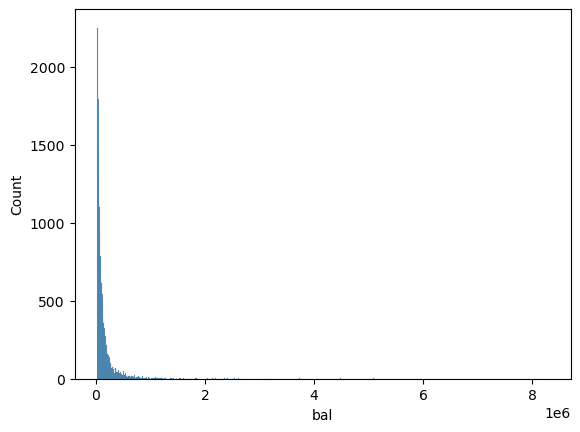

In [245]:
sns.histplot(data = df_female)

<Axes: xlabel='bal', ylabel='Count'>

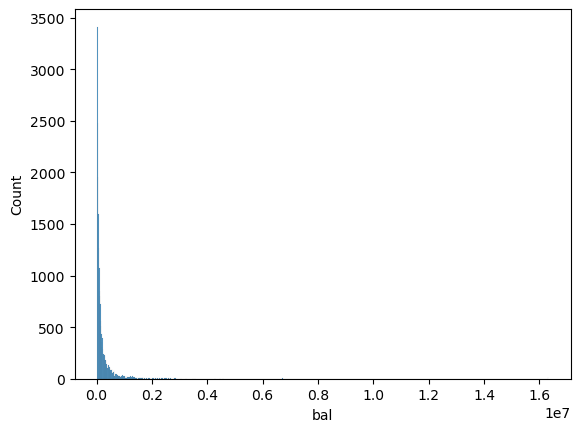

In [246]:
sns.histplot(df_male)

In [247]:
print(df_male.max(),df_female.max())

16320040.15 8292996.21


In [248]:
# for removing outliers
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [ ]:
# reference
# saves as a subset all rows in df['price] that are found in the outliers object
df_outliers = df['price'].isin(outliers)

In [259]:
male = tukeys_test_outliers(df_male)
female = tukeys_test_outliers(df_female)

male_out = df_male.isin(male)
female_out = df_female.isin(female)

df_male_no_out = df_male[~male_out]
df_female_no_out = df_female[~female_out]

In [264]:
print(df_male_no_out.max(),df_female_no_out.max())
print(df_male_no_out.min(),df_female_no_out.min())

514014.83 319787.12
23789.54 23789.49


<Axes: xlabel='bal', ylabel='Count'>

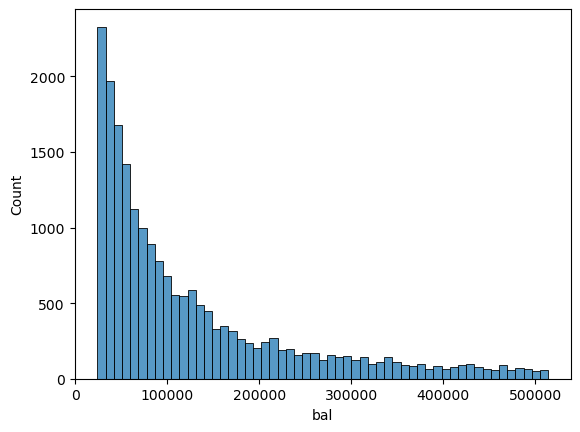

In [262]:
sns.histplot(df_male_no_out)

<Axes: xlabel='bal', ylabel='Count'>

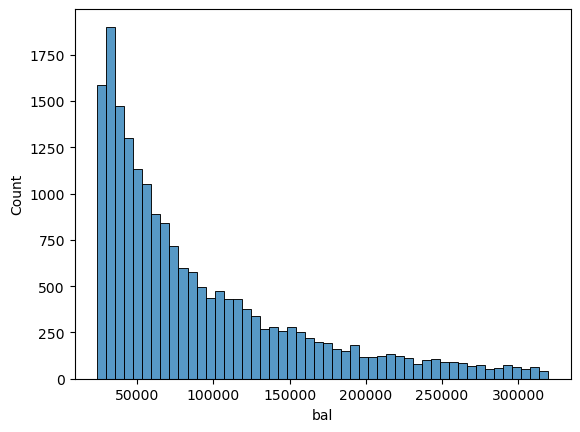

In [263]:
sns.histplot(df_female_no_out)

In [266]:
# Test subgroups for homoskedasticity
st.levene(df_male_no_out, df_female_no_out)
# low p-value means they don't have equal variance, so we need to set that to false for our ttest. 


# Removing outliers doesn't fix variance, but that's okay, because a two-sample t-test can handle that, we just need to specify that variance in the two is not equal. 

LeveneResult(statistic=1654.2741407561728, pvalue=0.0)

In [269]:
st.ttest_ind(df_male_no_out,df_female_no_out, equal_var=False)
# p-value being so low indicates that gender DOES in indeed have an impact on balance. 

# This could be explained by a few things. First off, given that gender wage gap is a prominent social issue, women could have lower investment balances simply because they have less money to invest. However, another influencing factor may be that men typically are investing for themselves and a spouse, and therefore need to invest more and carry a higher balance. When looking at our histogram plots, though, it is unsurprising that the differences are statistically significant, given that the graphs are automatically displayed on wildly different scales of income. 

TtestResult(statistic=38.707498369550166, pvalue=0.0, df=33106.639345980584)

In [ ]:
# drop rate v. balance

# H0 - there is no difference in the average balance between the people who dropped and those who did not. 
# HA - there is a difference in the average balance between the two groups. 

# H0 - ave balance for droppers = ave balance for not-droppers
# HA - ave balance for droppers != ave balance for not-droppers

In [272]:
# create sub categories
df_drop = last_visit_demos_df[last_visit_demos_df['dropped']==True]['bal']
df_not_drop = last_visit_demos_df[last_visit_demos_df['dropped']==False]['bal']

In [273]:
# Test subgroups for homoskedasticity
st.levene(df_drop, df_not_drop)
# low p-value means they don't have equal variance, so we need to set that to false for our ttest.

LeveneResult(statistic=35.937542666958294, pvalue=2.047943962286892e-09)

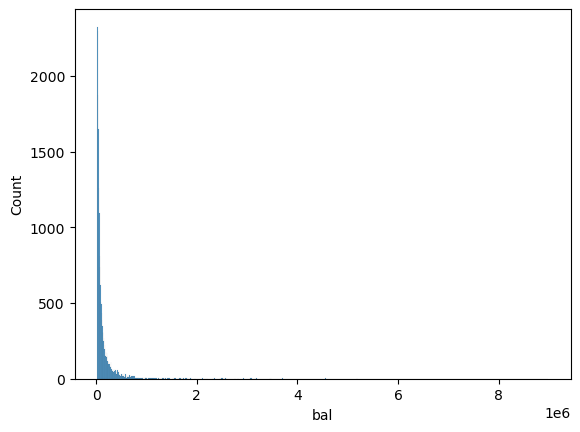

In [274]:
sns.histplot(df_drop);

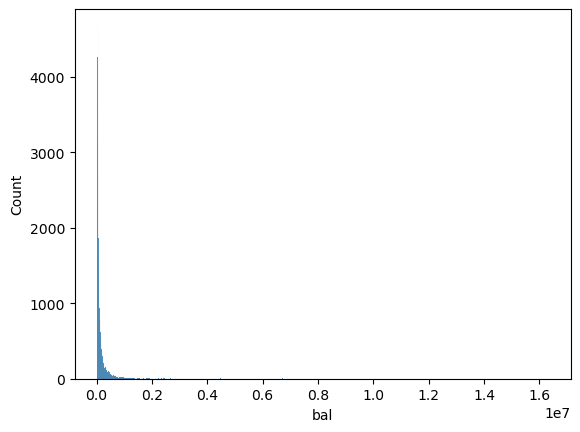

In [275]:
sns.histplot(df_not_drop);

In [276]:
drop = tukeys_test_outliers(df_drop)
not_drop = tukeys_test_outliers(df_not_drop)

drop_out = df_drop.isin(drop)
not_drop_out = df_not_drop.isin(not_drop)

df_drop_no_out = df_drop[~drop_out]
df_not_drop_no_out = df_not_drop[~not_drop_out]

In [277]:
# Test subgroups for homoskedasticity
st.levene(df_drop_no_out, df_not_drop_no_out)
# low p-value means they don't have equal variance, so we need to set that to false for our ttest.

LeveneResult(statistic=84.65347564115265, pvalue=3.6677895693208984e-20)

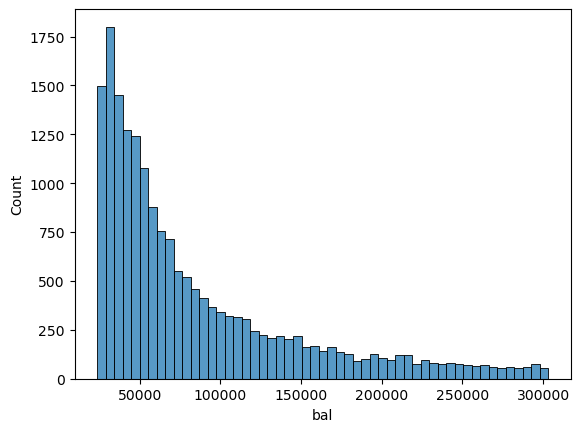

In [278]:
sns.histplot(df_drop_no_out);

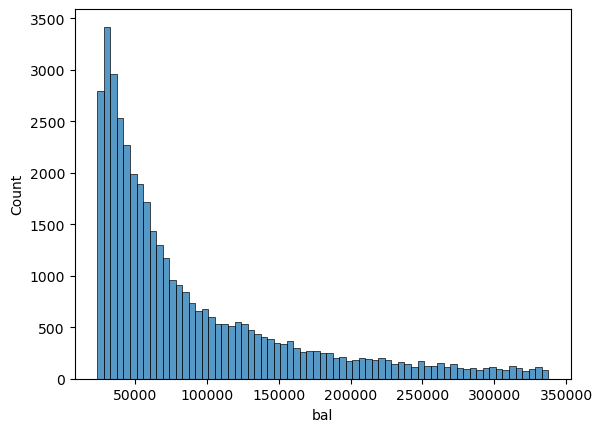

In [279]:
sns.histplot(df_not_drop_no_out);

In [282]:
st.ttest_ind(df_drop_no_out,df_not_drop_no_out, equal_var=False)

# low p-value indicates that there is a difference between the average balances among those who dropped and those who did not. Looking at the graphs, it seems that those who did not drop tend to have higher average balances than those who did drop. This is not surprising, as those with a lower balance are likely to pay less attention to their investments, likely because they are newer clients and still have longer to wait for their investments to mature, and don't feel the need to pay as close attention to what is happening to their investments. Additionally, those individuals who are more *invested* in their investments will have more motivation to work through the online process and will therefore likely be more familiar with it. 

TtestResult(statistic=-8.395260715656223, pvalue=4.802423921552259e-17, df=39180.31434699091)

In [ ]:
# Summarize

# KPI - completion rate - test group completed the process more freqently than control - keep changes
# KPI - bounce rate - test group had a lower bouncer rate than control - keep changes
# KPI - drop rate - no difference between test and control group
# Anova tests - unequal variance made anova tests irrelevent for several variables
# chi-square:
    # tenure step: test group showed noticeable improvements for completion rates in clients with longer tenure
    # calls v. drop: changes made seemed to make it easier for people who call more frequently to complete the online process at least once
    # tenure v. drop: results ambiguous
# two-sample t-tests:
    # gender v. bal: male clients have more invested
    # drop v. bal: clients who did not drop have more invested